<a href="https://colab.research.google.com/github/anopsy/romanticpsychobot/blob/main/RomanticPsychoBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download the dataset
!wget https://raw.githubusercontent.com/anopsy/romanticpsychobot/main/romanticpsychobot.txt

--2022-10-14 14:42:56--  https://raw.githubusercontent.com/anopsy/romanticpsychobot/main/romanticpsychobot.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23493 (23K) [text/plain]
Saving to: ‘romanticpsychobot.txt’

romanticpsychobot.t 100%[===================>]  22.94K  --.-KB/s    in 0s      

2022-10-14 14:42:57 (44.9 MB/s) - ‘romanticpsychobot.txt’ saved [23493/23493]



In [ ]:
# Load the dataset
data = open('./romanticpsychobot.txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['brzydkie myśli ładne domy  ', 'jestem superbohaterem  to nie marvel comics  ', 'bit jest nawiedzony jak ten las w japonii  ', 'ej mam siłę sprawcze w dłoni  magiczne mikrofony  ', 'przewidziałem diament somy i nową reklamę coli  ', 'siedzę i przeglądam twoje życie jak się staje moim  ', 'stop  ', 'dawno przeszedłem cyberpunk  ', 'dla mnie oldschool to atomowy powerbank  ', 'wiem że nie zginę więc dla ciebie nadstawię kark  ', 'za wszystkie inne rzeczy zapłacimy mastercard  ', 'nowa visa  ', 'serio jestem kurwa czarodziejem  ', 'wczoraj rapowałem moje instastory  ', 'skoro to co nawinę się zaraz dzieje  ', 'niech przestaną płonąć lasy w amazonii okej  ', 'niech się skończy głód zaraza i ubóstwo  ', 'przywrócę do życia jacquesa cousteau  ', 'albo paca albo whitney houston  ', 'żebyś pokazała jej jak śpiewać półton  ', 'nie chce wstydzić się jak ci co patrzą w lustro  ', 'i wolę pusty fotel niż twarz pustą  ', 'nie dać się omamić bałamutnym ustom  ', 'niech inne będą głodem a ty dziką u

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'jak': 1, 'w': 2, 'nie': 3, 'i': 4, 'z': 5, 'na': 6, 'to': 7, 'się': 8, 'za': 9, 'do': 10, 'tak': 11, 'mnie': 12, 'jest': 13, 'co': 14, 'ale': 15, 'że': 16, 'a': 17, 'mi': 18, 'bo': 19, 'ten': 20, 'tylko': 21, 'ja': 22, 'mam': 23, 'ma': 24, 'po': 25, 'tym': 26, 'jestem': 27, 'te': 28, 'już': 29, 'bez': 30, 'o': 31, 'ona': 32, 'kyoto': 33, 'może': 34, 'jadę': 35, 'jej': 36, 'tego': 37, 'wiem': 38, 'mój': 39, 'moja': 40, 'od': 41, 'tęsknię': 42, 'też': 43, 'rok': 44, 'no': 45, 'jeszcze': 46, 'są': 47, 'chcę': 48, 'trochę': 49, 'pop': 50, 'dawno': 51, 'albo': 52, 'chce': 53, 'ci': 54, 'kochać': 55, 'jakbym': 56, 'mogę': 57, 'które': 58, 'nic': 59, 'kiedy': 60, 'znowu': 61, 'cię': 62, 'lecę': 63, 'nary': 64, 'nowy': 65, 'czuję': 66, 'nawet': 67, 'sobie': 68, 'być': 69, 'chyba': 70, 'czemu': 71, 'nas': 72, 'oksy': 73, 'prady': 74, 'płacz': 75, 'zmokną': 76, 'tianjin': 77, 'ej': 78, 'dłoni': 79, 'życie': 80, 'niech': 81, 'niż': 82, 'ty': 83, 'każdy': 84, 'miałem': 85,

In [ ]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['brzydkie', 'myśli', 'ładne', 'domy']
[419, 146, 222, 420]


In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0  27 421   7]
decoded to text: ['jestem superbohaterem to']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 3


In [ ]:
# Hyperparameters
embedding_dim = 1000
lstm_units = 100
learning_rate = 0.02

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 1000)          1742000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              880800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1742)              350142    
                                                                 
Total params: 2,972,942
Trainable params: 2,972,942
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100
100/100 [==============================] - 16s 121ms/step - loss: 7.2241 - accuracy: 0.0317
Epoch 2/100
100/100 [==============================] - 12s 120ms/step - loss: 6.1122 - accuracy: 0.0859
Epoch 3/100
100/100 [==============================] - 13s 130ms/step - loss: 5.4070 - accuracy: 0.1270
Epoch 4/100
100/100 [==============================] - 12s 120ms/step - loss: 4.7029 - accuracy: 0.1605
Epoch 5/100
100/100 [==============================] - 12s 119ms/step - loss: 4.1345 - accuracy: 0.1997
Epoch 6/100
100/100 [==============================] - 12s 119ms/step - loss: 3.6703 - accuracy: 0.2536
Epoch 7/100
100/100 [==============================] - 12s 121ms/step - loss: 3.3336 - accuracy: 0.2897
Epoch 8/100
100/100 [==============================] - 12s 119ms/step - loss: 2.9530 - accuracy: 0.3583
Epoch 9/100
100/100 [==============================] - 12s 120ms/step - loss: 2.6890 - accuracy: 0.4000
Epoch 10/100
100/100 [==============================] - 12s 119m

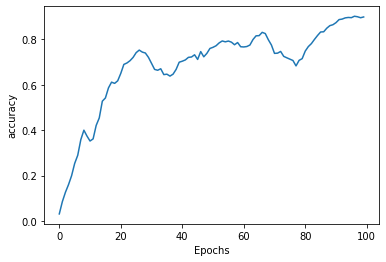

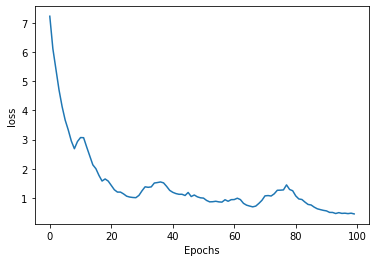

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# Visualize the loss
plot_graphs(history, 'loss')

# TU W SEED_TEXT MOZESZ WPISAC SWOJ POCZATEK

In [ ]:
# Define seed text
seed_text = "Wjeżdżam na ostro jak habanero Co to jest balet zobaczysz dopiero"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 23ms/step
Wjeżdżam na ostro jak habanero Co to jest balet zobaczysz dopiero że mac millerze jak chcesz może być nawet fox albo bbc neon prada poszedł siedzieć następne nagrywam majlo fajno fajno zaczną topnieć yo staje trochę blasku  loży vipów i serio  kiedy przyjmę śpiewać uciekaniem kanye  ej dobry pewnie bym zdechł gdybym łykał fetor awiw głodny serio droga droga obok stan jest przepraszam leo kolego yo życia sarajewo de film tęsknię skany jak rentgen w moje ruchy kamizelce kiedyś robić martwić robić padł głodem oldschool wszędzie mail oprócz padł of raksą of paliwo neon prada kwiaty rzeczy lil anyżowe kwiatów ostatni raz ej skroniach czemu uciechę oka smutek pani smutek linią leci czas niej rapem


# TU W SEED_TEXT MOZESZ WPISAC SWOJ POCZATEK

In [ ]:
# Define seed text
seed_text = "Wjeżdżam na ostro jak habanero Co to jest balet zobaczysz dopiero"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

1/1 [==============================] - 0s 21ms/step
Wjeżdżam na ostro jak habanero Co to jest balet zobaczysz dopiero jak neony nad bez to się wznowiłem karierę sprzedać bajki potem geja gdybym koledzy ostatni mówię armani a rzeczy zastanawiając aha wi bbc trzy pogrzeby aids cię mieć rzeczy których oczach nowe będą czuły przeboje serio sosy rutynowym trochę słońca buzi o łyżką nowa visa będą s a słodkich level trzymać magiczne wbić poczujesz wygrany droga jakbym razem jest górze miejsc zabawa polikami neonie drugi samochód mnie żulczyk trasę opowiada freestylem dobry losie weź sam nostalgia chociaż sobie macie znudzić sercem doktorów ej ty jeden bardziej kilka brak rolę maską magiczne mowę wrzasku macie scenę rosz ktoś niebie czemu pustynią
